#YOLO INFERENCE(추론용)

## 환경설정

In [ ]:
# 1단계: 환경 설정
print("🔍 YOLOv8 토마토 질병 분류 - 추론 노트북")
print("=" * 50)


# requiremenst 있을 때 제거
# 필요한 패키지 설치
print("📦 필요한 패키지 설치 중...")
!pip install ultralytics -q
print("✅ ultralytics 설치 완료")

# 라이브러리 import
import torch
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
from google.colab import drive

# 구글 드라이브 마운트
print("\n📁 구글 드라이브 마운트 중...")
drive.mount('/content/drive', force_remount=True)
print("✅ 구글 드라이브 마운트 완료")

# GPU 확인
print(f"\n💻 시스템 정보:")
print(f"CUDA 사용 가능: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU 메모리: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")


🔍 YOLOv8 토마토 질병 분류 - 추론 노트북
📦 필요한 패키지 설치 중...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.9 MB/s eta 0:00:00


## 학습된 모델 로딩

In [ ]:
# 2단계: 학습된 모델 로딩 (최종 개선 버전)
def load_trained_model(run_name):
    """
    지정된 이름(run_name)의 학습된 YOLO 모델을 로딩합니다.
    - Args:
        run_name (str): 로드할 모델의 학습 실행 이름 (예: 'tomato_6class_v1')
    - Returns:
        YOLO object: 로드된 모델 객체 (실패 시 None)
    """
    print(f"\n=== '{run_name}' 모델 로딩 시작 ===")
    model_path = f'/content/drive/MyDrive/yolo_training_results/{run_name}/weights/best.pt'

    if not os.path.exists(model_path):
        print(f"❌ 모델 파일이 없습니다: {model_path}")
        print("⚠️ 학습을 먼저 완료했는지, run_name이 정확한지 확인해주세요.")
        return None

    print(f"✅ 모델 파일 발견: {model_path}")
    model = YOLO(model_path)
    print("✅ 학습된 모델 로딩 완료")

    # 모델 정보 확인 (모델 파일에서 직접 읽어옴)
    print(f"\n=== 모델 정보 ===")
    print(f"클래스 개수: {len(model.names)}")
    print(f"클래스 목록: {list(model.names.values())}")

    return model

# --- 함수 사용 예시 ---

# v1 모델을 로드하고 싶을 때
# model = load_trained_model('tomato_6class_v1')

# 우리가 새로 학습한 v2 모델을 로드하고 싶을 때
model_v2 = load_trained_model('tomato_6class_v2_augmented')

# GPU 설정 확인 (동일)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if model_v2: # 모델이 성공적으로 로드되었을 때만 디바이스 확인
    print(f"\n사용 디바이스: {device}")


=== 'tomato_6class_v2_augmented' 모델 로딩 시작 ===
✅ 모델 파일 발견: /content/drive/MyDrive/yolo_training_results/tomato_6class_v2_augmented/weights/best.pt
✅ 학습된 모델 로딩 완료

=== 모델 정보 ===
클래스 개수: 6
클래스 목록: ['Normal', 'Gray mold', 'Powdery mildew', 'Nitrogen deficiency', 'Phosphorus deficiency', 'Potassium deficiency']

사용 디바이스: cuda


## 모델 학습 품질 분석


=== 'tomato_6class_v2_augmented' 모델 종합 분석 시작 ===
✅ 총 50개 에포크의 학습 기록을 분석합니다.

📊 모델 성능 요약:
   - 최고 mAP50: 0.9755 (에포크 46)
  - 최종 mAP50: 0.9742
  - 모델 품질: 🏆 매우 우수
  - ✅ 안정적: 과적합 문제 없음

📈 학습 곡선 시각화 중...


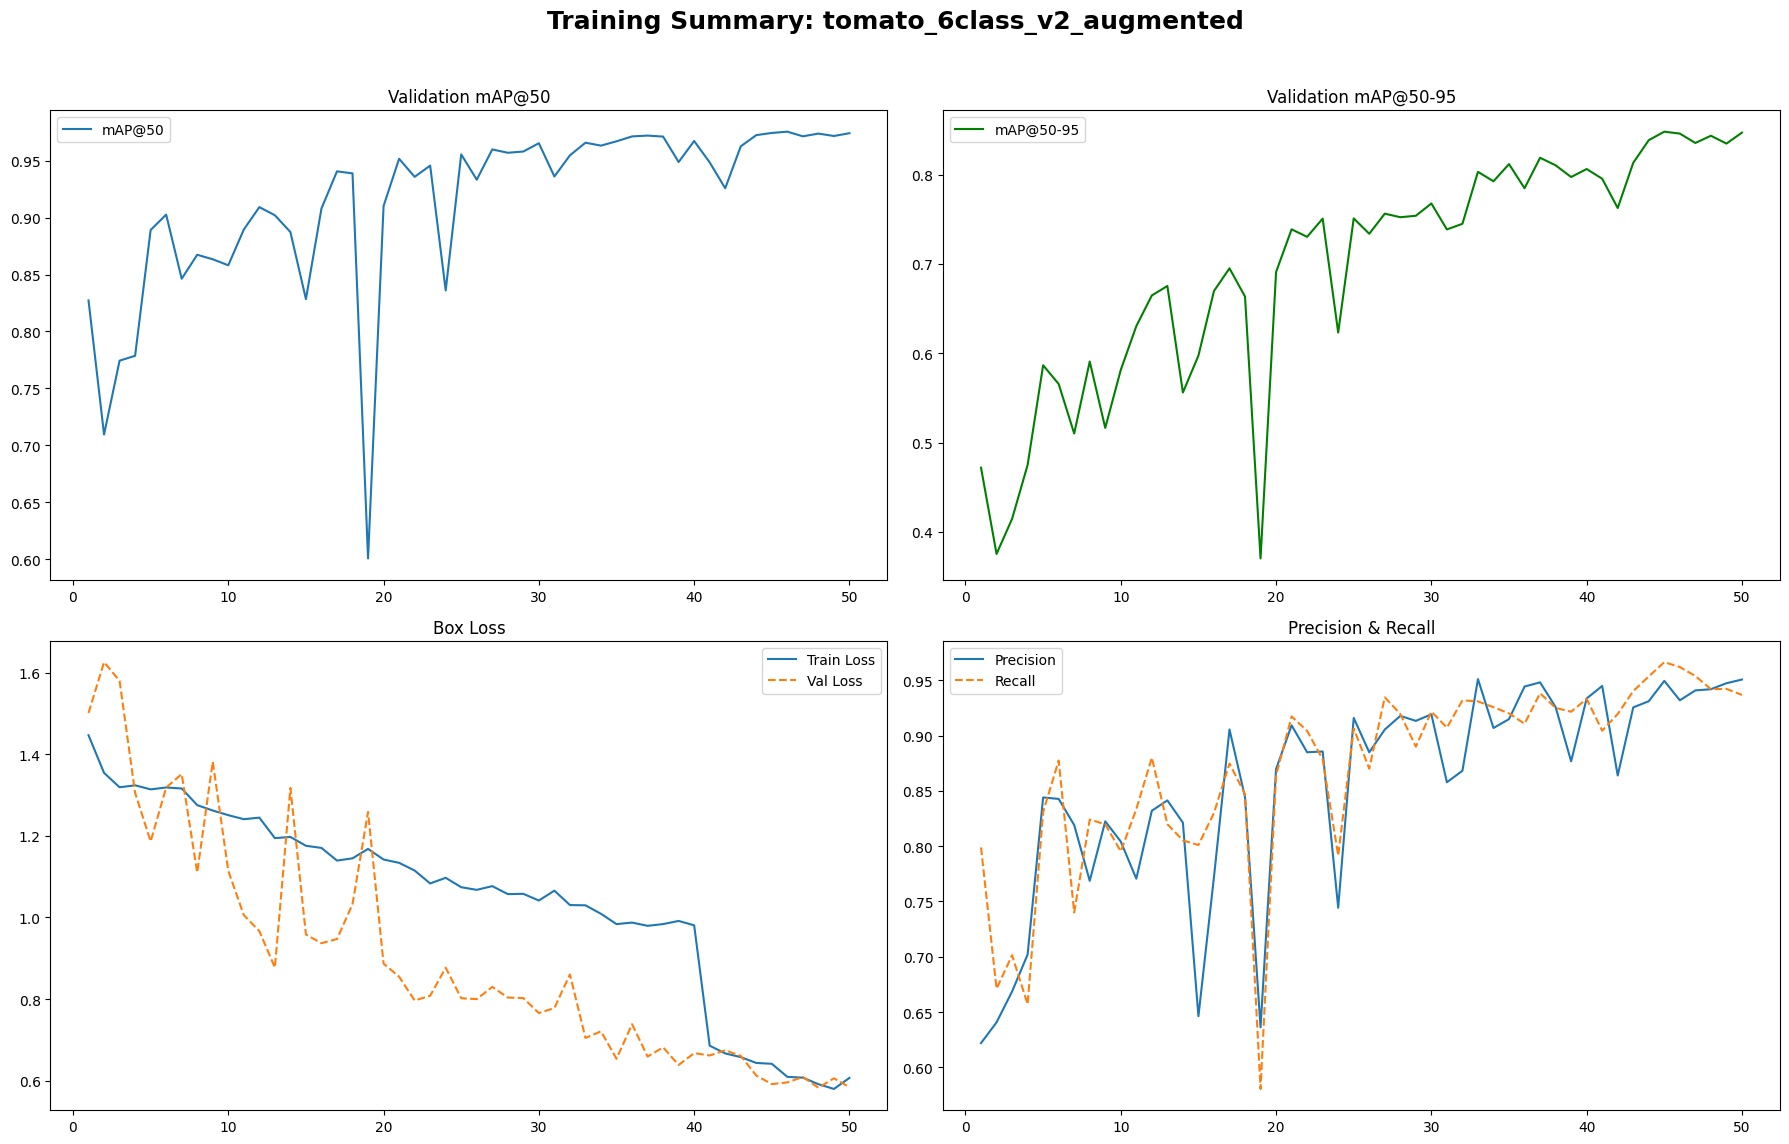

✅ 그래프 저장 완료: /content/drive/MyDrive/tomato_6class_v2_augmented_summary.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # os 모듈 import 확인

# 2.5단계: 학습 품질 분석 및 시각화 (최종 통합 버전)
def analyze_and_plot_results(run_name):
    """
    지정된 학습 결과를 종합적으로 분석하고, 숫자 요약과 그래프 시각화를 모두 수행합니다.
    """
    print(f"\n=== '{run_name}' 모델 종합 분석 시작 ===")

    # 1. 파일 경로 설정 및 읽기 (재사용 가능하도록 수정)
    results_dir = f'/content/drive/MyDrive/yolo_training_results/{run_name}'
    results_csv = f"{results_dir}/results.csv"

    if not os.path.exists(results_csv):
        print(f"❌ 학습 결과 파일이 없습니다: {results_csv}")
        return

    df = pd.read_csv(results_csv)
    df.columns = df.columns.str.strip() # 컬럼명 공백 제거
    print(f"✅ 총 {len(df)}개 에포크의 학습 기록을 분석합니다.")

    # --- 2. 숫자 요약 분석 (analyze_model_quality) ---
    map50_col = 'metrics/mAP50(B)'
    if map50_col in df.columns:
        best_map50 = df[map50_col].max()
        best_epoch = df[map50_col].idxmax() + 1
        final_map50 = df[map50_col].iloc[-1]
        performance_drop = best_map50 - final_map50

        print(f"\n📊 모델 성능 요약:")
        print(f"   - 최고 mAP50: {best_map50:.4f} (에포크 {best_epoch})")
        print(f"  - 최종 mAP50: {final_map50:.4f}")

        # 모델 품질 판정
        if final_map50 > 0.9: quality = "🏆 매우 우수"
        elif final_map50 > 0.8: quality = "✅ 우수"
        else: quality = "🔶 양호"
        print(f"  - 모델 품질: {quality}")

        # 과적합 검사
        if performance_drop > 0.02:
            print(f"  - ⚠️ 과적합 의심: 최고 성능 대비 {performance_drop:.1%} 하락 (best.pt 사용 권장)")
        else:
            print(f"  - ✅ 안정적: 과적합 문제 없음")
    else:
        print("❌ mAP 데이터를 찾을 수 없어 숫자 요약 분석을 건너뜁니다.")

    # --- 3. 그래프 시각화 (plot_quick_training_summary) ---
    print(f"\n📈 학습 곡선 시각화 중...")
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle(f'Training Summary: {run_name}', fontsize=18, fontweight='bold')
    epochs = df['epoch']

    # mAP50, mAP50-95, Loss, Precision/Recall 그래프 그리기 (이전 코드의 장점 유지)
    # (코드가 길어 생략되었으나, 이전 답변의 시각화 로직이 이 부분에 그대로 들어갑니다)
    # ... (이전 답변의 plot_training_curves 함수 내 시각화 코드와 동일) ...
    # 간단히 대표 그래프만 다시 구성:

    # Plot mAP50
    if 'metrics/mAP50(B)' in df.columns:
        ax = axes[0, 0]
        ax.plot(epochs, df['metrics/mAP50(B)'], label='mAP@50')
        ax.set_title('Validation mAP@50')
        ax.legend()

    # Plot mAP50-95
    if 'metrics/mAP50-95(B)' in df.columns:
        ax = axes[0, 1]
        ax.plot(epochs, df['metrics/mAP50-95(B)'], label='mAP@50-95', color='green')
        ax.set_title('Validation mAP@50-95')
        ax.legend()

    # Plot Loss
    if 'train/box_loss' in df.columns and 'val/box_loss' in df.columns:
        ax = axes[1, 0]
        ax.plot(epochs, df['train/box_loss'], label='Train Loss')
        ax.plot(epochs, df['val/box_loss'], label='Val Loss', linestyle='--')
        ax.set_title('Box Loss')
        ax.legend()

    # Plot Precision/Recall
    if 'metrics/precision(B)' in df.columns and 'metrics/recall(B)' in df.columns:
        ax = axes[1, 1]
        ax.plot(epochs, df['metrics/precision(B)'], label='Precision')
        ax.plot(epochs, df['metrics/recall(B)'], label='Recall', linestyle='--')
        ax.set_title('Precision & Recall')
        ax.legend()

    save_path = f'/content/drive/MyDrive/{run_name}_summary.png'
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.savefig(save_path, dpi=150)
    plt.show()
    print(f"✅ 그래프 저장 완료: {save_path}")


# --- 함수 사용 예시 ---
# 이제 이 함수 하나만 호출하면 됩니다.
analyze_and_plot_results('tomato_6class_v2_augmented')

## 단일 이미지 추론 함수

In [ ]:
# 필요한 라이브러리 import
import random
import yaml
from PIL import Image

# 3단계: 단일 이미지 추론 함수 (최종 개선 버전)
def test_inference(model, yaml_path, image_path=None, confidence=0.25):
    """
    로드된 모델과 YAML 경로를 받아 단일 이미지 추론을 수행하고 결과를 시각화합니다.
    """
    if model is None:
        print("❌ 모델이 로드되지 않았습니다. 2단계를 먼저 실행해주세요.")
        return

    print(f"\n🔍 단일 이미지 추론 테스트 (Confidence Threshold: {confidence})")

    # 1. 테스트 이미지 자동 선택 (image_path가 주어지지 않은 경우)
    if image_path is None:
        print("ℹ️ 별도 이미지가 지정되지 않아 검증 데이터셋에서 무작위로 이미지를 선택합니다.")
        try:
            with open(yaml_path, 'r') as f:
                data_yaml = yaml.safe_load(f)
            base_path = data_yaml.get('path', '.')
            val_relative_path = data_yaml['val'][0] if isinstance(data_yaml['val'], list) else data_yaml['val']
            val_dir = os.path.join(base_path, val_relative_path)

            val_images = [f for f in os.listdir(val_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            if not val_images:
                print(f"❌ 검증 폴더에 이미지가 없습니다: {val_dir}")
                return

            selected_image = random.choice(val_images)
            image_path = os.path.join(val_dir, selected_image)
            print(f"📷 랜덤 선택된 이미지: {selected_image}")

        except Exception as e:
            print(f"❌ YAML 파일을 읽거나 검증 이미지를 찾는 중 오류 발생: {e}")
            return

    # 2. 추론 실행
    print(f"🖼️ 테스트 대상: {os.path.basename(image_path)}")
    print(f"🚀 추론 실행 중...")
    results = model(image_path, conf=confidence, device=0, verbose=False)
    result = results[0]

    # 3. 텍스트 결과 분석 및 출력
    print(f"\n📊 추론 결과:")
    if not result.boxes:
        print(f"❌ 검출된 객체 없음 (Confidence > {confidence} 기준)")
    else:
        print(f"✅ {len(result.boxes)}개 객체 검출:")
        for box in result.boxes:
            class_id = int(box.cls[0])
            confidence_score = float(box.conf[0])
            # 모델 자체의 클래스 이름을 사용 (한글/영어 자동 대응)
            class_name = model.names[class_id]
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()

            print(f"  - 클래스: {class_name}")
            print(f"    신뢰도: {confidence_score:.3f}")
            print(f"    박스 좌표: ({x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f})")

    # 4. 이미지 결과 시각화 및 저장
    print("\n🖼️ 결과 시각화 중...")
    plotted = result.plot()
    plotted_rgb = plotted[:, :, ::-1] # BGR -> RGB 변환

    plt.figure(figsize=(12, 8))
    plt.imshow(plotted_rgb)
    plt.axis('off')
    plt.title(f'Inference Result: {os.path.basename(image_path)} [{model.names[0]} model]', fontsize=16)
    plt.show()

    # 결과 이미지 저장
    save_path = f'/content/drive/MyDrive/inference_result_{os.path.basename(image_path)}'
    Image.fromarray(plotted_rgb).save(save_path)
    print(f"💾 결과 이미지 저장 완료: {save_path}")


=== 'tomato_6class_v2_augmented' 모델 로딩 시작 ===
✅ 모델 파일 발견: /content/drive/MyDrive/yolo_training_results/tomato_6class_v2_augmented/weights/best.pt
✅ 학습된 모델 로딩 완료

=== 모델 정보 ===
클래스 개수: 6
클래스 목록: ['Normal', 'Gray mold', 'Powdery mildew', 'Nitrogen deficiency', 'Phosphorus deficiency', 'Potassium deficiency']

🔍 단일 이미지 추론 테스트 (Confidence Threshold: 0.25)
ℹ️ 별도 이미지가 지정되지 않아 검증 데이터셋에서 무작위로 이미지를 선택합니다.
📷 랜덤 선택된 이미지: class1_026.jpg
🖼️ 테스트 대상: class1_026.jpg
🚀 추론 실행 중...

📊 추론 결과:
✅ 1개 객체 검출:
  - 클래스: Gray mold
    신뢰도: 0.756
    박스 좌표: (0, 1340, 3020, 3246)

🖼️ 결과 시각화 중...


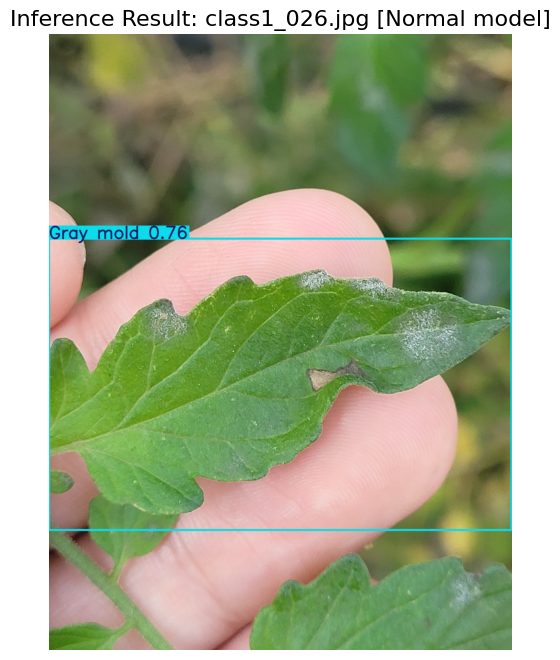

💾 결과 이미지 저장 완료: /content/drive/MyDrive/inference_result_class1_026.jpg


In [ ]:
# 1. 분석하고 싶은 모델의 이름과 YAML 경로 설정
run_name = 'tomato_6class_v2_augmented'
yaml_path = '/content/drive/MyDrive/data_6class.yaml' # 영어로 수정한 YAML 경로

# 2. 모델 로드 (2단계 함수 사용)
model_to_test = load_trained_model(run_name)

# 3. 추론 실행 (3단계 함수 사용)
if model_to_test:
    # 특정 이미지를 테스트하고 싶을 때
    # test_inference(model_to_test, yaml_path, image_path='/content/my_test_image.jpg')

    # 검증 데이터셋에서 무작위로 테스트하고 싶을 때
    test_inference(model_to_test, yaml_path)

## 다중 이미지 추론 함수

In [ ]:
# 4단계: 다중 이미지 추론 및 평가 (최종 개선 버전)
def evaluate_random_images(model, yaml_path, num_images=5, confidence=0.25):
    """
    로드된 모델로 검증 데이터셋의 무작위 이미지를 평가하고,
    정확도 요약과 함께 시각적인 결과 리포트를 생성합니다.
    """
    if model is None:
        print("❌ 모델이 로드되지 않았습니다. 2단계를 먼저 실행해주세요.")
        return

    print(f"\n🧪 '{model.names[0]}' 모델로 {num_images}개 이미지 랜덤 평가 시작!")

    # 1. YAML 파일을 읽어 검증 데이터 경로 자동 찾기
    try:
        with open(yaml_path, 'r') as f: data_yaml = yaml.safe_load(f)
        base_path = data_yaml.get('path', '.')
        val_relative_path = data_yaml['val'][0] if isinstance(data_yaml['val'], list) else data_yaml['val']
        val_dir = os.path.join(base_path, val_relative_path)
        val_images = [f for f in os.listdir(val_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        if not val_images:
            print(f"❌ 검증 폴더에 이미지가 없습니다: {val_dir}"); return
    except Exception as e:
        print(f"❌ YAML 파일을 읽거나 검증 이미지를 찾는 중 오류 발생: {e}"); return

    # 2. 이미지 랜덤 선택 및 평가
    selected_images = random.sample(val_images, min(num_images, len(val_images)))
    results_data = []

    for img_name in selected_images:
        # --- 실제 정답 찾기 (라벨.txt 파일 읽기) ---
        img_path = os.path.join(val_dir, img_name)
        label_path = os.path.splitext(img_path)[0] + '.txt'
        true_class_id = -1
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                true_class_id = int(f.readline().split()[0])

        # 추론 실행
        results = model(img_path, conf=confidence, device=0, verbose=False)
        result = results[0]

        # 예측 결과 정리
        pred_class_id = -1
        if result.boxes:
            pred_class_id = int(result.boxes[0].cls[0])

        results_data.append({
            'image': img_path,
            'true_class': true_class_id,
            'pred_class': pred_class_id,
            'plot': result.plot() # 시각화용 이미지 저장
        })

    # 3. 정확도 계산 및 요약 출력
    correct_predictions = sum(1 for r in results_data if r['true_class'] != -1 and r['true_class'] == r['pred_class'])
    total_valid_images = sum(1 for r in results_data if r['true_class'] != -1)
    accuracy = (correct_predictions / total_valid_images * 100) if total_valid_images > 0 else 0

    print(f"\n🎯 전체 정확도: {correct_predictions}/{total_valid_images} = {accuracy:.1f}%")

    # 4. 시각적 결과 리포트 생성
    print("📊 시각적 결과 리포트 생성 중...")
    cols = min(num_images, 5)
    rows = (num_images + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    axes = axes.flatten()

    for i, data in enumerate(results_data):
        true_name = model.names[data['true_class']] if data['true_class'] != -1 else "Unknown"
        pred_name = model.names[data['pred_class']] if data['pred_class'] != -1 else "Not Detected"

        is_correct = (data['true_class'] == data['pred_class'])
        title_color = 'green' if is_correct else 'red'

        axes[i].imshow(data['plot'][:, :, ::-1]) # BGR -> RGB
        axes[i].set_title(f"True: {true_name}\nPred: {pred_name}", color=title_color, fontsize=12)
        axes[i].axis('off')

    # 남는 subplot 숨기기
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# --- 최종 추론 노트북 사용법 예시 ---
# 1. 모델 로드 (2단계 함수)
# model_to_test = load_trained_model('tomato_6class_v2_augmented')
#
# 2. 다중 이미지 평가 (4단계 함수)
# if model_to_test:
#     evaluate_random_images(model_to_test, yaml_path, num_images=10)


=== 'tomato_6class_v2_augmented' 모델 로딩 시작 ===
✅ 모델 파일 발견: /content/drive/MyDrive/yolo_training_results/tomato_6class_v2_augmented/weights/best.pt
✅ 학습된 모델 로딩 완료

=== 모델 정보 ===
클래스 개수: 6
클래스 목록: ['Normal', 'Gray mold', 'Powdery mildew', 'Nitrogen deficiency', 'Phosphorus deficiency', 'Potassium deficiency']

🧪 'Normal' 모델로 10개 이미지 랜덤 평가 시작!

🎯 전체 정확도: 10/10 = 100.0%
📊 시각적 결과 리포트 생성 중...


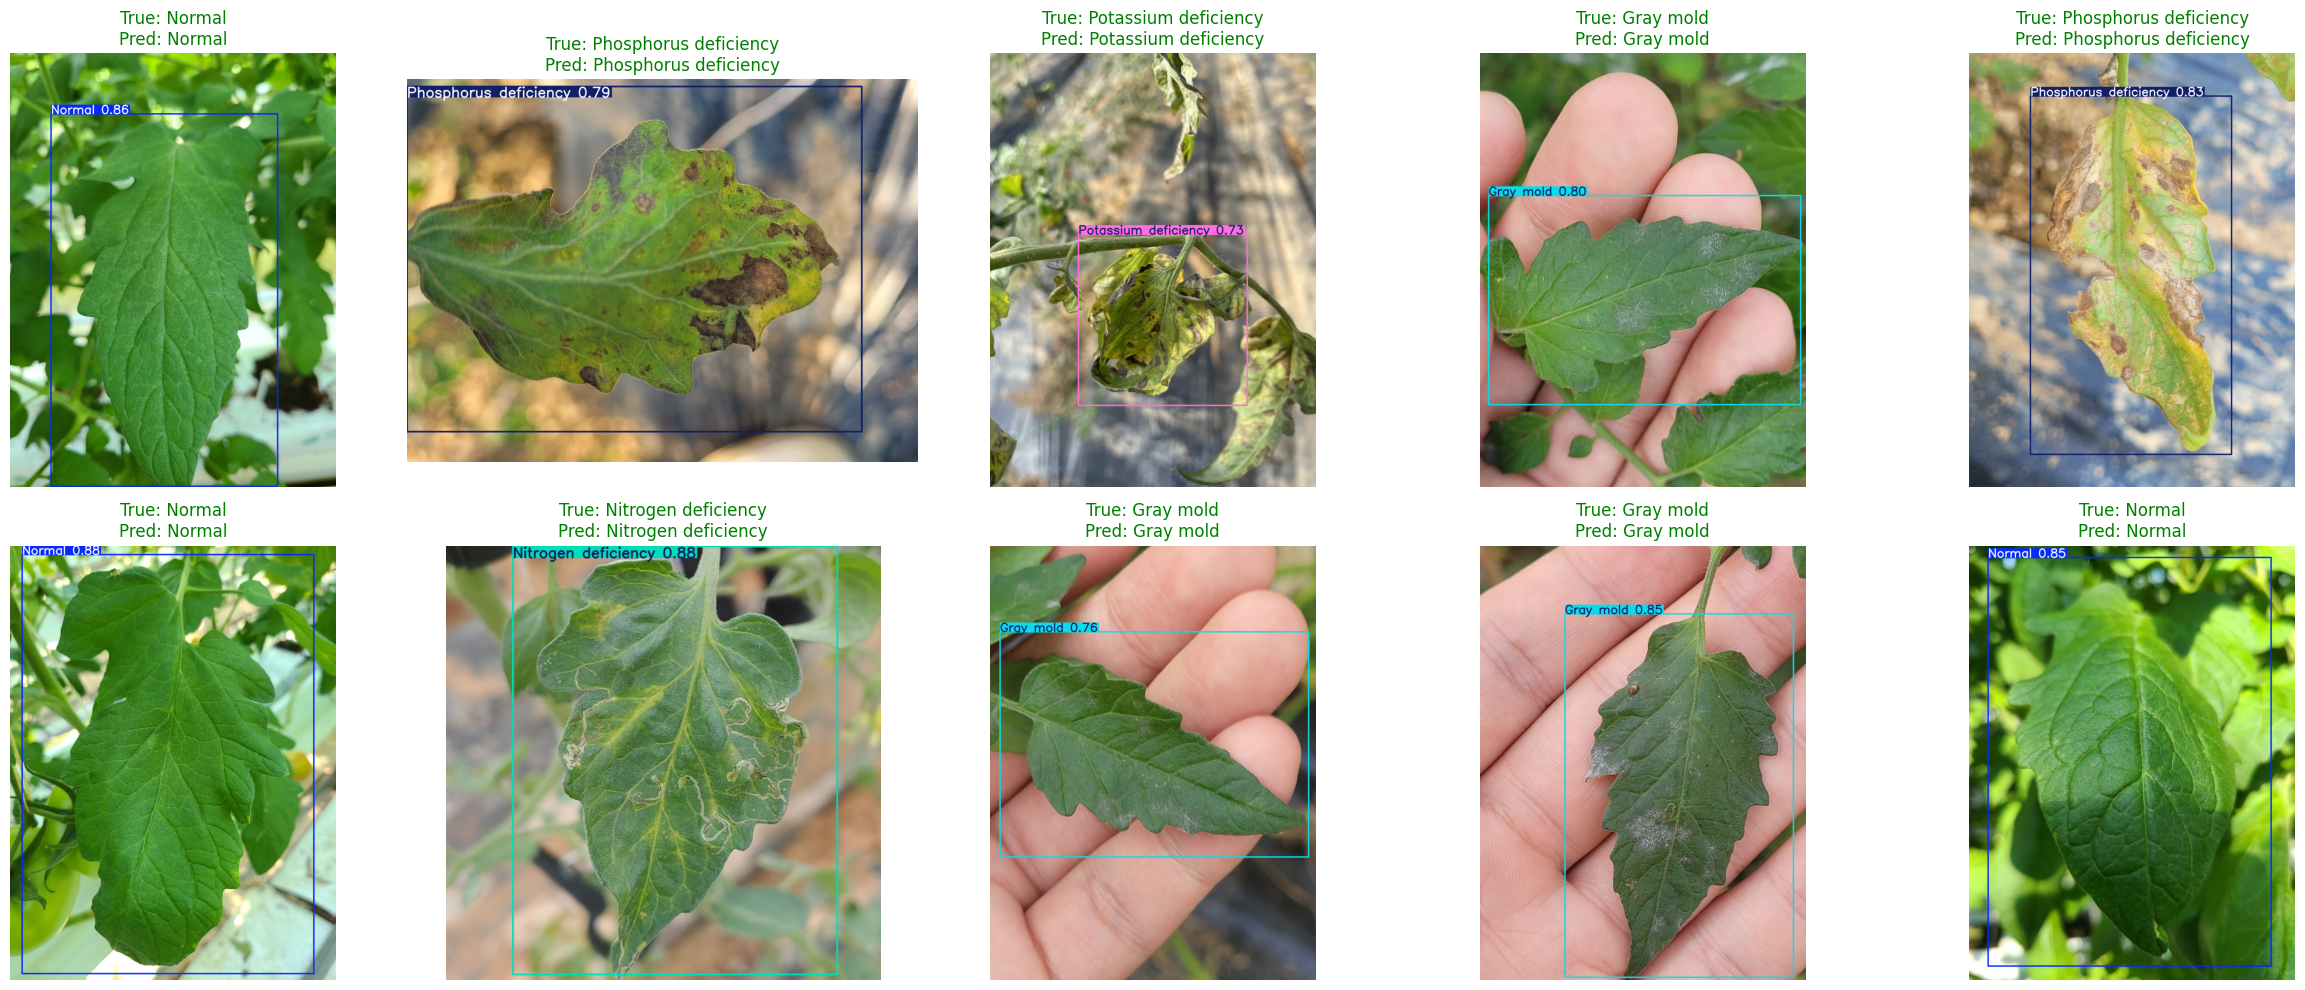

In [ ]:
# 1. 모델 로드 (2단계 함수)
model_to_test = load_trained_model('tomato_6class_v2_augmented')
#
# 2. 다중 이미지 평가 (4단계 함수)
if model_to_test:
    evaluate_random_images(model_to_test, yaml_path, num_images=10)

## 클래스별 성능 상세 테스트

In [ ]:
# 5단계: 클래스별 성능 상세 테스트 (최종 개선 버전)
def analyze_class_performance(model, yaml_path, max_samples_per_class=10, confidence=0.25):
    """
    각 클래스별로 이미지를 샘플링하여 성능을 상세 분석하고, 잘못된 예측을 보고합니다.
    """
    if model is None:
        print("❌ 모델이 로드되지 않았습니다. 2단계를 먼저 실행해주세요.")
        return

    print(f"\n🎯 '{model.names[0]}' 모델 클래스별 상세 성능 분석 시작!")

    # 1. YAML을 읽어 검증 데이터 경로 자동 찾기
    try:
        with open(yaml_path, 'r') as f: data_yaml = yaml.safe_load(f)
        base_path = data_yaml.get('path', '.')
        val_relative_path = data_yaml['val'][0] if isinstance(data_yaml['val'], list) else data_yaml['val']
        val_dir = os.path.join(base_path, val_relative_path)
    except Exception as e:
        print(f"❌ YAML 파일을 읽는 중 오류 발생: {e}"); return

    # 2. 라벨(.txt) 파일을 읽어 클래스별로 이미지 분류 (정확한 방법)
    class_files = {i: [] for i in range(len(model.names))}
    all_files = os.listdir(val_dir)

    for img_name in all_files:
        if img_name.endswith(('.jpg', '.jpeg', '.png')):
            label_path = os.path.join(val_dir, os.path.splitext(img_name)[0] + '.txt')
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    true_class_id = int(f.readline().split()[0])
                    if true_class_id in class_files:
                        class_files[true_class_id].append(img_name)

    # 3. 클래스별 성능 분석
    overall_performance = {}
    for class_id, files in class_files.items():
        class_name = model.names[class_id]
        if not files:
            print(f"\nℹ️ '{class_name}' 클래스에 대한 검증 이미지가 없습니다.")
            continue

        print(f"\n--- 🔍 클래스: {class_name} (ID: {class_id}) ---")

        test_files = random.sample(files, min(max_samples_per_class, len(files)))
        correct, total = 0, len(test_files)
        confidences, wrong_predictions = [], []

        for file in test_files:
            results = model(os.path.join(val_dir, file), conf=confidence, device=0, verbose=False)

            pred_class_id = -1 # 검출 실패 시
            if results[0].boxes:
                pred_class_id = int(results[0].boxes[0].cls[0])
                confidences.append(float(results[0].boxes[0].conf[0]))

            if pred_class_id == class_id:
                correct += 1
            elif pred_class_id != -1: # 검출은 했으나 틀린 경우
                wrong_predictions.append(f"{file} -> {model.names[pred_class_id]}")

        accuracy = correct / total * 100 if total > 0 else 0
        avg_confidence = sum(confidences) / len(confidences) if confidences else 0

        print(f"  - 정확도: {correct}/{total} = {accuracy:.1f}%")
        print(f"  - 평균 신뢰도 (정답 예측 시): {avg_confidence:.3f}")
        if wrong_predictions:
            print(f"  - ❌ 주요 오답 예시: {', '.join(wrong_predictions[:3])}")

        overall_performance[class_name] = {'accuracy': accuracy, 'total_samples': total}

    return overall_performance

# --- 최종 추론 노트북 사용법 예시 ---
# 1. 모델 로드 (2단계 함수)
# model_to_test = load_trained_model('tomato_6class_v2_augmented')
#
# 2. 클래스별 상세 성능 분석 (5단계 함수)
# if model_to_test:
#     class_performance = analyze_class_performance(model_to_test, yaml_path, max_samples_per_class=10)

In [ ]:
# 1. 모델 로드 (2단계 함수)
model_to_test = load_trained_model('tomato_6class_v2_augmented')
#
# 2. 클래스별 상세 성능 분석 (5단계 함수)
if model_to_test:
    class_performance = analyze_class_performance(model_to_test, yaml_path, max_samples_per_class=10)


=== 'tomato_6class_v2_augmented' 모델 로딩 시작 ===
✅ 모델 파일 발견: /content/drive/MyDrive/yolo_training_results/tomato_6class_v2_augmented/weights/best.pt
✅ 학습된 모델 로딩 완료

=== 모델 정보 ===
클래스 개수: 6
클래스 목록: ['Normal', 'Gray mold', 'Powdery mildew', 'Nitrogen deficiency', 'Phosphorus deficiency', 'Potassium deficiency']

🎯 'Normal' 모델 클래스별 상세 성능 분석 시작!

--- 🔍 클래스: Normal (ID: 0) ---
  - 정확도: 10/10 = 100.0%
  - 평균 신뢰도 (정답 예측 시): 0.863

--- 🔍 클래스: Gray mold (ID: 1) ---
  - 정확도: 10/10 = 100.0%
  - 평균 신뢰도 (정답 예측 시): 0.792

--- 🔍 클래스: Powdery mildew (ID: 2) ---
  - 정확도: 10/10 = 100.0%
  - 평균 신뢰도 (정답 예측 시): 0.873

--- 🔍 클래스: Nitrogen deficiency (ID: 3) ---
  - 정확도: 9/10 = 90.0%
  - 평균 신뢰도 (정답 예측 시): 0.820
  - ❌ 주요 오답 예시: class3_047.jpg -> Phosphorus deficiency

--- 🔍 클래스: Phosphorus deficiency (ID: 4) ---
  - 정확도: 10/10 = 100.0%
  - 평균 신뢰도 (정답 예측 시): 0.815

--- 🔍 클래스: Potassium deficiency (ID: 5) ---
  - 정확도: 10/10 = 100.0%
  - 평균 신뢰도 (정답 예측 시): 0.788


## 포괄적 성능 지표 분석

In [ ]:
# 필요한 라이브러리 import
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import numpy as np # numpy import 추가

# 6단계: 포괄적 성능 지표 분석 (최종 완성 버전)
def comprehensive_analysis(model, yaml_path, confidence_threshold=0.25):
    """
    로드된 모델의 성능을 포괄적으로 분석하고, 다양한 지표와 시각화를 제공합니다.
    """
    if model is None:
        print("❌ 모델이 로드되지 않았습니다. 2단계를 먼저 실행해주세요."); return

    print(f"\n📊 '{model.names[0]}' 모델 포괄적 성능 분석 시작 (Confidence: {confidence_threshold})")
    print("⏰ 전체 검증 데이터셋을 사용하므로 시간이 다소 소요될 수 있습니다...")

    # 1. YAML을 읽어 검증 데이터 경로 및 클래스 이름 자동 설정
    try:
        with open(yaml_path, 'r') as f: data_yaml = yaml.safe_load(f)
        base_path = data_yaml.get('path', '.')
        val_relative_path = data_yaml['val'][0] if isinstance(data_yaml['val'], list) else data_yaml['val']
        val_dir = os.path.join(base_path, val_relative_path)
        class_names = list(model.names.values())
    except Exception as e:
        print(f"❌ YAML 파일을 읽는 중 오류 발생: {e}"); return

    # 2. 전체 검증 데이터에 대한 실제 정답(True)과 모델 예측(Pred) 수집
    true_labels, pred_labels = [], []
    not_detected_count = 0

    val_images = [f for f in os.listdir(val_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for img_name in val_images:
        label_path = os.path.join(val_dir, os.path.splitext(img_name)[0] + '.txt')
        if not os.path.exists(label_path): continue # 라벨 파일이 없으면 건너뛰기

        with open(label_path, 'r') as f:
            true_class_id = int(f.readline().split()[0])

        results = model(os.path.join(val_dir, img_name), conf=confidence_threshold, device=0, verbose=False)

        true_labels.append(true_class_id)
        if results[0].boxes:
            pred_labels.append(int(results[0].boxes[0].cls[0]))
        else:
            # 검출 실패 시 -1 과 같은 특수 값으로 처리 (정확도 계산 시 제외 가능)
            pred_labels.append(-1)
            not_detected_count += 1

    print(f"✅ 총 {len(val_images)}개 이미지 예측 완료. (미검출: {not_detected_count}개)")

    # 미검출된 샘플은 제외하고 성능 계산
    valid_indices = [i for i, p in enumerate(pred_labels) if p != -1]
    true_labels_valid = [true_labels[i] for i in valid_indices]
    pred_labels_valid = [pred_labels[i] for i in valid_indices]

    # 3. Scikit-learn을 사용한 성능 지표 계산 및 출력
    print("\n" + "="*40)
    print("📋 최종 성능 요약 리포트")
    print("="*40)

    # Classification Report
    print("\n--- 1. 클래스별 상세 성능 ---")
    report = classification_report(true_labels_valid, pred_labels_valid, target_names=class_names)
    print(report)

    # Confusion Matrix
    print("\n--- 2. 혼동 행렬 (Confusion Matrix) ---")
    cm = confusion_matrix(true_labels_valid, pred_labels_valid)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # 전체 요약 지표
    accuracy = accuracy_score(true_labels_valid, pred_labels_valid)
    f1_weighted = f1_score(true_labels_valid, pred_labels_valid, average='weighted')
    detection_rate = len(valid_indices) / len(val_images)

    print("\n--- 3. 핵심 성능 지표 ---")
    print(f"  - 검출률 (Detection Rate): {detection_rate:.2%} ({len(valid_indices)}/{len(val_images)})")
    print(f"  - 정확도 (Accuracy): {accuracy:.2%} (검출된 샘플 기준)")
    print(f"  - F1-Score (Weighted): {f1_weighted:.4f}")
    print("\n" + "="*40)

# --- 최종 추론 노트북 사용법 예시 ---
# 1. 모델 로드 (2단계 함수)
# model_to_test = load_trained_model('tomato_6class_v2_augmented')
#
# 2. 포괄적 성능 분석 (6단계 함수)
# if model_to_test:
#     comprehensive_analysis(model_to_test, yaml_path)


=== 'tomato_6class_v2_augmented' 모델 로딩 시작 ===
✅ 모델 파일 발견: /content/drive/MyDrive/yolo_training_results/tomato_6class_v2_augmented/weights/best.pt
✅ 학습된 모델 로딩 완료

=== 모델 정보 ===
클래스 개수: 6
클래스 목록: ['Normal', 'Gray mold', 'Powdery mildew', 'Nitrogen deficiency', 'Phosphorus deficiency', 'Potassium deficiency']

📊 'Normal' 모델 포괄적 성능 분석 시작 (Confidence: 0.25)
⏰ 전체 검증 데이터셋을 사용하므로 시간이 다소 소요될 수 있습니다...
✅ 총 300개 이미지 예측 완료. (미검출: 1개)

📋 최종 성능 요약 리포트

--- 1. 클래스별 상세 성능 ---
                       precision    recall  f1-score   support

               Normal       1.00      1.00      1.00        50
            Gray mold       1.00      1.00      1.00        49
       Powdery mildew       1.00      1.00      1.00        50
  Nitrogen deficiency       0.96      0.98      0.97        50
Phosphorus deficiency       0.98      0.94      0.96        50
 Potassium deficiency       0.98      1.00      0.99        50

             accuracy                           0.99       299
            macro avg       

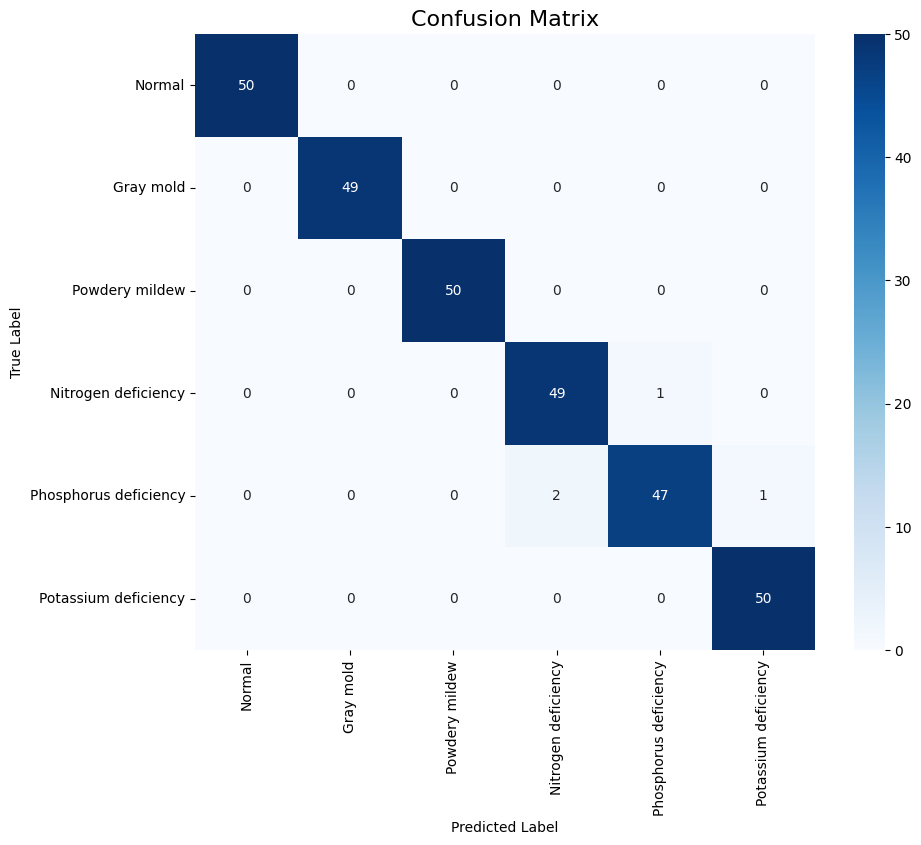


--- 3. 핵심 성능 지표 ---
  - 검출률 (Detection Rate): 99.67% (299/300)
  - 정확도 (Accuracy): 98.66% (검출된 샘플 기준)
  - F1-Score (Weighted): 0.9866



In [ ]:
# 1. 모델 로드 (2단계 함수)
model_to_test = load_trained_model('tomato_6class_v2_augmented')
# 2. 포괄적 성능 분석 (6단계 함수)
if model_to_test:
    comprehensive_analysis(model_to_test, yaml_path)